# Schmidt et al. 2016 Proteome data set

© 2021 Tom Röschinger
. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

***

In this notebook we will explore a huge data set in which the abundance (in terms absolute copy number) of more than 2000 proteins of *E. Coli* was measured in 22 different growth conditions. You can find the paper [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4888949/). In this notebook, we will use the tables from the supplementary information that you can find [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4888949/bin/NIHMS65833-supplement-Supplementary_tables.xlsx). This notebook will give an example on how to work with real world data, what kind of manipulations one has to do and how one can extract usefull and possibly even new information from datasets that are already around.

In [2]:
import numpy as np
import pandas as pd

import bokeh.io
import bokeh.plotting
from bokeh.models.tickers import FixedTicker

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%config InputBackend.figure_format = 'retina'

bokeh.io.output_notebook()

Loading BokehJS ...

First we read in the dataset. The data comes in excel files, but `Pandas` has a very useful function to import excel sheets as well. For now, we are only considering a single table, so we can specify the sheet in the excel file that we want to extract. The file contains multiple level of headers, so we need to tell pandas where the headers are.

In [30]:
# Import data. Change path if necessary
df = pd.read_excel('../../data/heinemann_data.xlsx', sheet_name='Table S6', header=[2])
df.head()

/Users/tomroschinger/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Uniprot Accession,Description,Gene,Peptides.used.for.quantitation,Confidence.score,Molecular weight (Da),Dataset,Glucose,LB,Glycerol + AA,...,Xylose.2,Mannose.2,Galactose .2,Succinate.2,Fructose.2,Gene.1,Bnumber,Annotated functional COG groups (letter),Annotated functional COG group (description),Annotated functional COG class
0,P0A8T7,DNA-directed RNA polymerase subunit beta' OS=E...,rpoC,91,6045.53,155045.0080,2,2778.519359,7164.365261,4503.008971,...,6.274283,16.152135,22.867137,16.451382,9.285230,rpoC,b3988,K,Transcription,INFORMATION STORAGE AND PROCESSING
1,P0A8V2,DNA-directed RNA polymerase subunit beta OS=Es...,rpoB,89,5061.29,150520.2758,2,3957.434464,8888.466379,5198.560850,...,4.266261,13.509190,19.751833,13.599596,7.765106,rpoB,b3987,K,Transcription,INFORMATION STORAGE AND PROCESSING
2,P36683,Aconitate hydratase 2 OS=Escherichia coli (str...,acnB,67,4505.67,93420.9457,2,7595.542046,16599.719405,17548.341931,...,21.777276,3.157398,2.066660,4.211018,3.247899,acnB,b0118,C,Energy production and conversion,METABOLISM
3,P15254,Phosphoribosylformylglycinamidine synthase OS=...,purL,65,4277.71,141295.8984,2,2456.265985,820.685737,2339.023495,...,7.879870,1.219968,7.687927,2.960045,6.197638,purL,b2557,F,Nucleotide transport and metabolism,METABOLISM
4,P09831,Glutamate synthase [NADPH] large chain OS=Esch...,gltB,64,4111.74,163176.3153,2,2858.930632,604.305858,651.951059,...,20.053563,17.706768,22.361857,10.686944,8.909157,gltB,b3212,E,Amino acid transport and metabolism,METABOLISM


Some of the columns did not have a column header at the first level, therefore, we make our life easier and give all these columns a common level 0 header called `metadata`.

In [32]:
df = df[df['Gene'].notna()]

In [33]:
growth_conditions = ['Glucose',
 'LB',
 'Glycerol + AA',
 'Acetate',
 'Fumarate',
 'Glucosamine',
 'Glycerol',
 'Pyruvate',
 'Chemostat µ=0.5',
 'Chemostat µ=0.35',
 'Chemostat µ=0.20',
 'Chemostat µ=0.12',
 'Stationary phase 1 day',
 'Stationary phase 3 days',
 'Osmotic-stress glucose',
 '42°C glucose',
 'pH6 glucose',
 'Xylose',
 'Mannose',
 'Galactose ',
 'Succinate',
 'Fructose']
growth_conditions

['Glucose',
 'LB',
 'Glycerol + AA',
 'Acetate',
 'Fumarate',
 'Glucosamine',
 'Glycerol',
 'Pyruvate',
 'Chemostat µ=0.5',
 'Chemostat µ=0.35',
 'Chemostat µ=0.20',
 'Chemostat µ=0.12',
 'Stationary phase 1 day',
 'Stationary phase 3 days',
 'Osmotic-stress glucose',
 '42°C glucose',
 'pH6 glucose',
 'Xylose',
 'Mannose',
 'Galactose ',
 'Succinate',
 'Fructose']

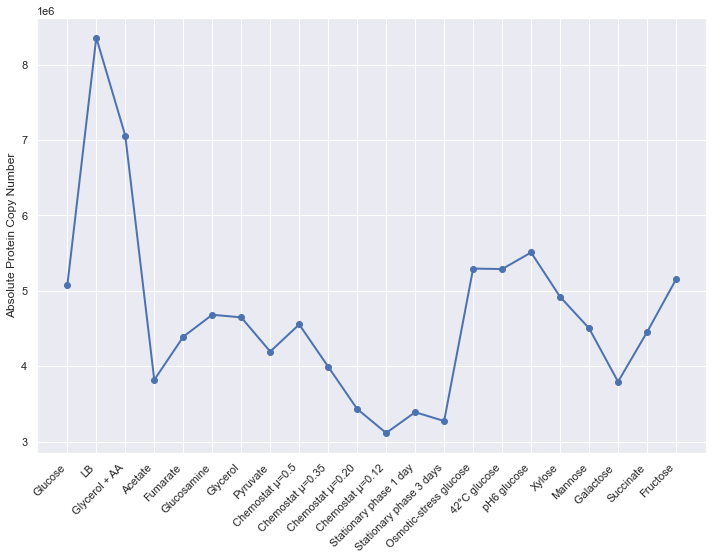

In [109]:
# Compute mean copy number per growth condition
df_norm = df[growth_conditions].apply(np.sum)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot mean values
ax.plot(np.arange(len(df_norm)), df_norm.values,'-o', lw=2)


ax.set_ylabel("Absolute Protein Copy Number")
ax.set_xticks(np.arange(len(df_norm)))
ax.set_xticklabels(list(df_norm.index), rotation = 45, ha="right");

In [62]:
# Genes involved in Pathway
gal_genes = df_var.iloc[0:20]["Gene"].values

# Build data frame from these genes
sub_df = df.loc[[gene in gal_genes for gene in df['Gene']], :]
sub_df

,Uniprot Accession,Description,Gene,Peptides.used.for.quantitation,Confidence.score,Molecular weight (Da),Dataset,Glucose,LB,Glycerol + AA,...,Xylose.2,Mannose.2,Galactose .2,Succinate.2,Fructose.2,Gene.1,Bnumber,Annotated functional COG groups (letter),Annotated functional COG group (description),Annotated functional COG class
7,P0CE47,Elongation factor Tu 1 OS=Escherichia coli (st...,tufA,57,4565.07,43238.30279,2,252452.056424,443852.263240,368887.953992,...,0.707132,2.959255,3.214860,3.924059,3.949925,tufA,b3339,J,"Translation, ribosomal structure and biogenesis",INFORMATION STORAGE AND PROCESSING
25,P25553,Lactaldehyde dehydrogenase OS=Escherichia coli...,aldA,41,2623.32,52221.71682,2,3501.370795,11228.635705,10885.228789,...,16.819419,4.258468,6.397493,15.851005,5.089861,aldA,b1415,C,Energy production and conversion,METABOLISM
38,P0A9G6,Isocitrate lyase OS=Escherichia coli (strain K...,aceA,36,2786.72,47473.57659,2,28173.349675,15283.455084,25688.173078,...,5.562555,4.367645,6.427056,13.189016,8.773502,aceA,b4015,C,Energy production and conversion,METABOLISM
83,P0A910,Outer membrane protein A OS=Escherichia coli (...,ompA,29,2046.35,37159.64679,2,119679.886373,146530.058925,155610.665987,...,12.411291,5.410457,9.740763,11.633537,3.497713,ompA,b0957,M,Cell wall/membrane/envelope biogenesis,CELLULAR PROCESSES AND SIGNALING
103,P0AEE5,D-galactose-binding periplasmic protein OS=Esc...,mglB,27,1604.39,35672.35627,2,3223.218099,20142.660472,21711.280420,...,7.932936,1.810633,3.504426,9.275644,11.282256,mglB,b2150,G,Carbohydrate transport and metabolism,METABOLISM
106,P61889,Malate dehydrogenase OS=Escherichia coli (stra...,mdh,27,2213.00,32299.20422,2,53137.587151,73161.637801,110645.455290,...,4.081639,2.306095,5.115117,8.839575,10.067842,mdh,b3236,C,Energy production and conversion,METABOLISM
114,P0ABK5,Cysteine synthase A OS=Escherichia coli (strai...,cysK,26,2393.10,34450.28634,2,73308.489438,21810.531886,70875.539814,...,7.207888,1.653791,6.378579,4.031203,4.571162,cysK,b2414,E,Amino acid transport and metabolism,METABOLISM
201,P02931,Outer membrane protein F OS=Escherichia coli (...,ompF,19,1364.11,39291.06024,2,24017.447325,15900.637819,66033.905959,...,3.637078,7.690037,2.271648,17.457261,9.790076,ompF,b0929,M,Cell wall/membrane/envelope biogenesis,CELLULAR PROCESSES AND SIGNALING
248,P0ABT2,DNA protection during starvation protein OS=Es...,dps,17,1282.41,18665.72624,2,4697.585181,10434.596191,5517.361105,...,25.614315,7.002652,3.196105,22.829942,13.146411,dps,b0812,P,Inorganic ion transport and metabolism,METABOLISM
346,P0AE08,Alkyl hydroperoxide reductase subunit C OS=Esc...,ahpC,14,1193.70,20730.40145,2,58487.427996,77833.864872,71074.915850,...,3.155213,2.557030,5.718883,0.461344,4.852072,ahpC,b0605,O,"Posttranslational modification, protein turnov...",CELLULAR PROCESSES AND SIGNALING


In [121]:
def copy_number_plot(genes, normalized=False):
    """
    Plot the copy number of a list of genes in all 
    growth conditions.
    """
    
    fig, ax = plt.subplots(figsize=(12,6))

    # Iterate through genes
    for i, gene in enumerate(genes):
        # Extract row for gene
        row = df.loc[df['Gene'] == gene, :]
        # Get protein copy numbers
        y = row[growth_conditions].values[0]
        mask = np.isfinite(y)
        # Normalize
        if normalized:
            y = y[mask] / df_norm.values[mask]
        
        # Plot and make label
        ax.plot(
            np.arange(22)[mask],
            y,
            '-o',
            label="{} ({})".format(gene, row['Annotated functional COG class'].values[0]))


    # Annotate plot
    if normalized:
        ax.set_ylabel("Normalized Protein Copy Number")
    else:
        ax.set_ylabel("Protein Copy Number")
    ax.legend(bbox_to_anchor=(1.05, 1))
    ax.set_xticks(np.arange(len(growth_conditions)))
    ax.set_xticklabels(labels=growth_conditions, rotation = 45, ha="right");
    return ax

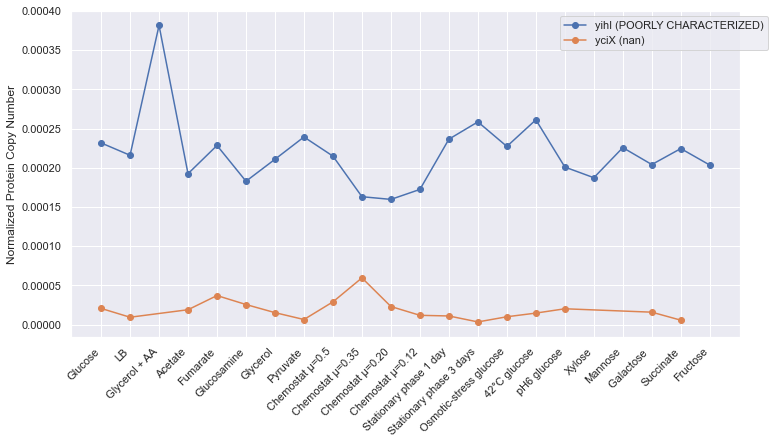

In [122]:
copy_number_plot(gal_genes, True);

In [123]:
def compute_variation(df):
    return np.var(df[growth_conditions].values[0] / df_norm) / np.mean(df[growth_conditions].values[0] / df_norm)

In [124]:
df_var = df.groupby(
    ['Gene']
).apply(
    compute_variation
).reset_index(
    name="variation"
).sort_values(
    'variation', 
    ascending=False
).reset_index(
    drop=True
)

df_var.head(10)

,Gene,variation
0,hdeA,0.023210
1,aceA,0.019312
2,dps,0.011305
3,ecnB,0.009578
4,mcbA,0.006165
5,tnaA,0.005454
6,mglB,0.004952
7,xylA,0.004915
8,gatB,0.003857
9,lpp,0.003550


In [125]:
df_var.iloc[0:20]["Gene"].values

array(['hdeA', 'aceA', 'dps', 'ecnB', 'mcbA', 'tnaA', 'mglB', 'xylA',
       'gatB', 'lpp', 'osmY', 'glpK', 'aldA', 'mdh', 'osmC', 'gatY',
       'asnA', 'osmB', 'cusF', 'idnO'], dtype=object)

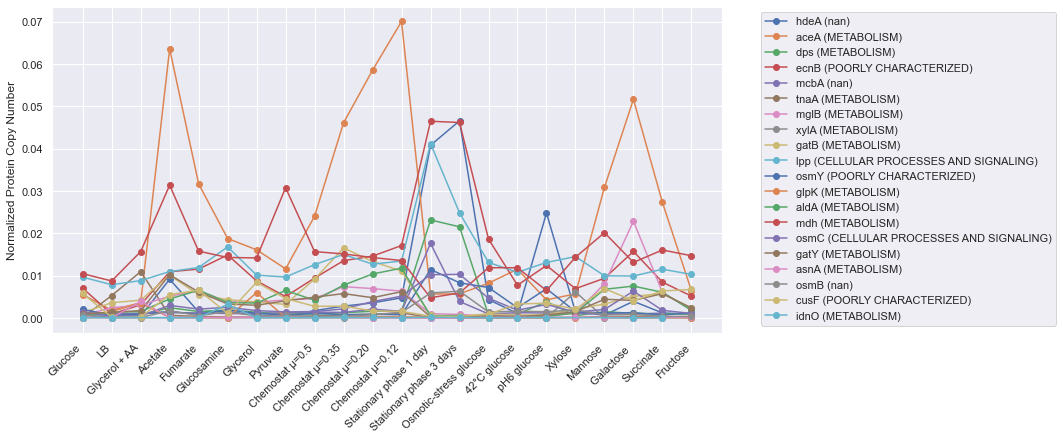

In [126]:
copy_number_plot(df_var.iloc[0:20]["Gene"].values, True);

In [148]:
# Genes involved in Pathway
var_genes = df_var.iloc[0:1000]["Gene"].values
var_genes

array(['hdeA', 'aceA', 'dps', 'ecnB', 'mcbA', 'tnaA', 'mglB', 'xylA',
       'gatB', 'lpp', 'osmY', 'glpK', 'aldA', 'mdh', 'osmC', 'gatY',
       'asnA', 'osmB', 'cusF', 'idnO', 'argT', 'uspA', 'hdeB', 'metE',
       'yahO', 'ompF', 'modA', 'tufA', 'ompX', 'cysK', 'rbsB', 'gltA',
       'slp', 'idnD', 'malE', 'acs', 'ahpC', 'ompA', 'acnB', 'rplL',
       'dnaK', 'yjbJ', 'aceB', 'gatA', 'livJ', 'rplV', 'rplX', 'ompC',
       'elaB', 'rpsJ', 'rpsG', 'xylF', 'rpsP', 'ndk', 'hupB', 'ilvC',
       'rpmC', 'osmE', 'glpD', 'bfr', 'rpmE', 'sucD', 'gapA', 'groS',
       'fruB', 'sucC', 'aldB', 'yqjD', 'rplP', 'rpsO', 'eno', 'ygaU',
       'cstA', 'gatZ', 'groL', 'rplA', 'wrbA', 'rpsT', 'thrC', 'rpsU',
       'manX', 'cspE', 'pyrI', 'rplI', 'ptsG', 'hupA', 'rpmF', 'ybaY',
       'rpmG', 'rplJ', 'rplE', 'yhhA', 'ygiW', 'guaB', 'metK', 'atpD',
       'rpsM', 'udp', 'proX', 'rpmA', 'cspC', 'pyrB', 'cirA', 'acpP',
       'oppA', 'yncE', 'pckA', 'aceF', 'rpsB', 'rpsS', 'fusA', 'rplM',
       'msyB', 

In [149]:
 var_genes.astype('U')

array(['hdeA', 'aceA', 'dps', 'ecnB', 'mcbA', 'tnaA', 'mglB', 'xylA',
       'gatB', 'lpp', 'osmY', 'glpK', 'aldA', 'mdh', 'osmC', 'gatY',
       'asnA', 'osmB', 'cusF', 'idnO', 'argT', 'uspA', 'hdeB', 'metE',
       'yahO', 'ompF', 'modA', 'tufA', 'ompX', 'cysK', 'rbsB', 'gltA',
       'slp', 'idnD', 'malE', 'acs', 'ahpC', 'ompA', 'acnB', 'rplL',
       'dnaK', 'yjbJ', 'aceB', 'gatA', 'livJ', 'rplV', 'rplX', 'ompC',
       'elaB', 'rpsJ', 'rpsG', 'xylF', 'rpsP', 'ndk', 'hupB', 'ilvC',
       'rpmC', 'osmE', 'glpD', 'bfr', 'rpmE', 'sucD', 'gapA', 'groS',
       'fruB', 'sucC', 'aldB', 'yqjD', 'rplP', 'rpsO', 'eno', 'ygaU',
       'cstA', 'gatZ', 'groL', 'rplA', 'wrbA', 'rpsT', 'thrC', 'rpsU',
       'manX', 'cspE', 'pyrI', 'rplI', 'ptsG', 'hupA', 'rpmF', 'ybaY',
       'rpmG', 'rplJ', 'rplE', 'yhhA', 'ygiW', 'guaB', 'metK', 'atpD',
       'rpsM', 'udp', 'proX', 'rpmA', 'cspC', 'pyrB', 'cirA', 'acpP',
       'oppA', 'yncE', 'pckA', 'aceF', 'rpsB', 'rpsS', 'fusA', 'rplM',
       'msyB', 

In [150]:
np.savetxt("../../data/var_genes.txt", var_genes.astype('U'), delimiter=',', fmt="%s")